In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle



import json 

token = {"username":"seunghwan1228","key":"54998fd3ecb0cfc867851a23041ebbc3"}

with open('/content/drive/My Drive/Colab Notebooks/Kaggle Kernel/kaggle.json', 'w') as file:
  json.dump(token, file)
  
  
  
!cp drive/'My Drive'/'Colab Notebooks'/'Kaggle Kernel'/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json


# down load path

# !kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification
# !kaggle competitions download -c aptos2019-blindness-detection
!kaggle competitions download -c freesound-audio-tagging-2019

kaggle.json
total 4
-rw------- 1 root root 72 Jan 18 08:33 kaggle.json
{"username": "seunghwan1228", "key": "54998fd3ecb0cfc867851a23041ebbc3"}Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.6 / client 1.5.4)
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 51.3MB/s]
  0% 0.00/571k [00:00<?, ?B/s]
100% 571k/571k [00:00<00:00, 80.4MB/s]
100% 2.23G/2.24G [00:26<00:00, 85.4MB/s]
100% 2.24G/2.24G [00:26<00:00, 91.2MB/s]
 22% 463M/2.08G [00:13<00:48, 36.4MB/s]
User cancelled operation


In [0]:
!rm train_noisy.csv
!rm train_noisy.zip

In [0]:
import os

os.mkdir('train_curated')
os.chdir('train_curated')

In [0]:
%mv /content/train_curated.zip /content/train_curated/train_curated.zip

In [6]:
!unzip train_curated.zip

Archive:  train_curated.zip
  inflating: c1b84d6f.wav            
  inflating: 37acc887.wav            
  inflating: 8d1fb22b.wav            
  inflating: fd621ec3.wav            
  inflating: b2196421.wav            
  inflating: 5ea6937f.wav            
  inflating: 03ea2668.wav            
  inflating: d3184ca4.wav            
  inflating: 775a890a.wav            
  inflating: a25aedbc.wav            
  inflating: 50242b6c.wav            
  inflating: 59099afd.wav            
  inflating: 08f26926.wav            
  inflating: 3ede79fd.wav            
  inflating: 23ee33f6.wav            
  inflating: 7419fde6.wav            
  inflating: 84e4fa67.wav            
  inflating: cbc963cb.wav            
  inflating: 950b1afa.wav            
  inflating: 9950cecb.wav            
  inflating: 92601183.wav            
  inflating: 8ebf9f33.wav            
  inflating: 824d9810.wav            
  inflating: 77e2a2d8.wav            
  inflating: 1d35e64d.wav            
  inflating: 5f9e42a3.

## Import Dependencies


https://www.kaggle.com/carlolepelaars/bidirectional-lstm-for-audio-labeling-with-keras


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython
from tqdm import tqdm, tqdm_notebook, tqdm_pandas
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import keras
import tensorflow as tf
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import (Dense, Bidirectional, CuDNNLSTM, ELU,
                          Dropout, LeakyReLU, Conv1D, BatchNormalization)
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping



import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
df = pd.read_csv('/content/train_curated.csv')

In [9]:
print('the files are : ',  len(os.listdir()))

the files are :  4971


In [10]:
df.shape

(4970, 2)

In [11]:
df.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


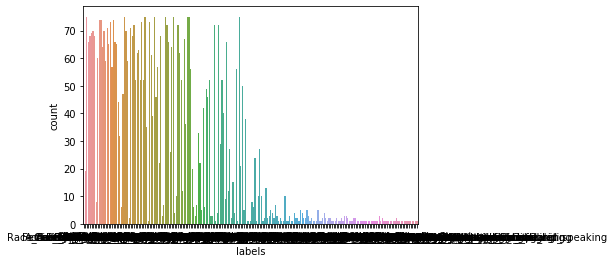

In [12]:
sns.countplot('labels', data =df)
plt.show()

In [13]:
df.labels.nunique()

213

In [0]:
target = df['labels'].values


In [0]:
le = LabelEncoder()

In [0]:
target_tf = le.fit_transform(target.reshape(-1,1))

In [0]:
le_class_enumerator = le.classes_


le_class_mapper = {}
for inds, i in enumerate(le.classes_):
  le_class_mapper[inds] = i

In [18]:
le_class_mapper

{0: 'Accelerating_and_revving_and_vroom',
 1: 'Accordion',
 2: 'Acoustic_guitar',
 3: 'Acoustic_guitar,Strum',
 4: 'Applause,Cheering',
 5: 'Applause,Cheering,Clapping',
 6: 'Applause,Clapping',
 7: 'Applause,Crowd',
 8: 'Applause,Crowd,Cheering',
 9: 'Applause,Crowd,Clapping',
 10: 'Applause,Dishes_and_pots_and_pans,Crowd,Cheering,Clapping,Child_speech_and_kid_speaking',
 11: 'Applause,Harmonica',
 12: 'Applause,Harmonica,Cheering',
 13: 'Applause,Screaming,Crowd',
 14: 'Bark',
 15: 'Bark,Chirp_and_tweet',
 16: 'Bark,Cricket',
 17: 'Bark,Cricket,Buzz',
 18: 'Bark,Walk_and_footsteps',
 19: 'Bass_drum',
 20: 'Bass_guitar',
 21: 'Bathtub_(filling_or_washing)',
 22: 'Bathtub_(filling_or_washing),Child_speech_and_kid_speaking',
 23: 'Bathtub_(filling_or_washing),Gurgling',
 24: 'Bathtub_(filling_or_washing),Sink_(filling_or_washing)',
 25: 'Bathtub_(filling_or_washing),Sink_(filling_or_washing),Water_tap_and_faucet',
 26: 'Bathtub_(filling_or_washing),Water_tap_and_faucet',
 27: 'Bicycle_b

In [0]:
target = to_categorical(target_tf)

In [20]:
target

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# Preprocessing parameters
sr = 44100 # Sampling rate
duration = 5
hop_length = 347 # to make time steps 128
fmin = 20
fmax = sr // 2
n_mels = 128
n_fft = n_mels * 20
samples = sr * duration


In [22]:
print(fmax)
print(n_fft)
print(samples)

22050
2560
220500


In [0]:
def read_audio(path):
  y, _ = librosa.load(path, sr=44100)

  # trim silence
  # y = signal length
  if 0 < len(y):
    y, _ = librosa.effects.trim(y)

  if len(y) > samples:
    y = y[0:0+samples]
  
  else:
    padding = samples - len(y)
    offset = padding // 2
    y = np.pad(y, (offset, samples - len(y) - offset), 'constant')

  return y

In [0]:
test_signal = read_audio(os.listdir()[0])

In [25]:
test_signal

array([ 0.00054932,  0.00265503,  0.00256348, ...,  0.00140381,
        0.00082397, -0.00192261], dtype=float32)

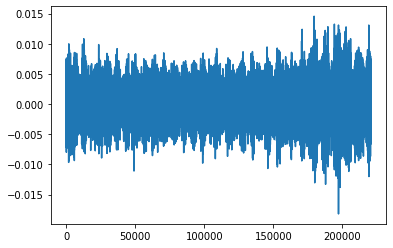

In [26]:
plt.plot(test_signal)
plt.show()

In [27]:
IPython.display.Audio(os.listdir()[0])

Output hidden; open in https://colab.research.google.com to view.

In [0]:
def audio_to_melspectrogram(audio):
  spectrogram = librosa.feature.melspectrogram(audio,
                                               sr=sr,
                                               n_mels=n_mels,
                                               hop_length=hop_length,
                                               n_fft=n_fft,
                                               fmin = fmin,
                                               fmax=fmax)
  return librosa.power_to_db(spectrogram).astype(np.float32)

In [0]:
test_melspectrogram = audio_to_melspectrogram(test_signal)

In [30]:
test_melspectrogram

array([[-58.886284, -57.59556 , -56.29243 , ..., -48.054913, -42.517822,
        -39.9001  ],
       [-50.284794, -51.594196, -49.820385, ..., -46.676426, -44.898148,
        -42.764378],
       [-40.981358, -40.573174, -40.378216, ..., -32.326694, -32.02375 ,
        -31.040833],
       ...,
       [-43.125706, -42.99497 , -42.564674, ..., -47.445618, -47.16123 ,
        -47.849167],
       [-49.181435, -49.10113 , -48.748844, ..., -51.219242, -50.81444 ,
        -50.759983],
       [-51.900047, -51.830833, -51.04471 , ..., -54.465218, -54.745113,
        -54.67862 ]], dtype=float32)

In [31]:
test_melspectrogram.shape

(128, 636)

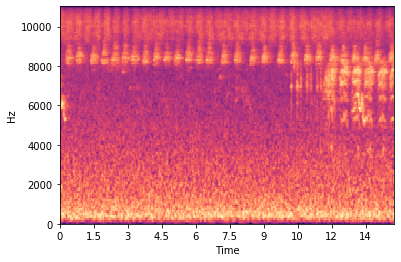

In [32]:
librosa.display.specshow(test_melspectrogram, x_axis='time', y_axis='hz')

In [0]:
def read_as_melspectrogram(path):
  mels = audio_to_melspectrogram(read_audio(path))
  return mels

In [0]:
def convert_wav_to_image(df, path):
  X = []
  for _, row in tqdm_notebook(df.iterrows()):
    x = read_as_melspectrogram('{}/{}'.format(path[0], str(row['fname'])))
    X.append(x.transpose())

  return X

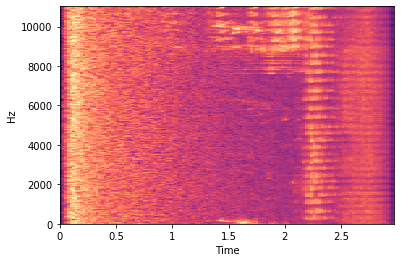

In [35]:
librosa.display.specshow(test_melspectrogram.T, x_axis='time', y_axis='hz')

In [0]:
def normalize(img):
  '''
  Standard Scaling (x - min) / std(x)
  '''
  eps = 0.001
  if np.std(img) != 0:
    img = (img - np.mean(img)) / np.std(img)
  else:
    img = (img - np.mean(img)) / eps

  return img

In [0]:
def normalize_dataset(X):
  normalized_dataset = []
  for img in X:
    normalized = normalize(img)
    normalized_dataset.append(normalized)
  return normalized_dataset

In [38]:
df.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


In [39]:
df[df['fname'] == '0006ae4e.wav']

,fname,labels
0,0006ae4e.wav,Bark


In [0]:
os.chdir('/content')

In [41]:
X= np.array(convert_wav_to_image(df, ['/content/train_curated']))


In [0]:
X=normalize_dataset(X)

In [45]:
X[0].shape

(636, 128)

In [74]:
target.shape

(4970, 213)

In [0]:
# X = np.array(convert_wav_to_image(df, [train_curated_path]))
# X = normalize_dataset(X)
# Y = df[label_columns].values
x_train, x_val, y_train, y_val = train_test_split(X, target, test_size=0.1, random_state=1228)

In [0]:
class Attention(keras.layers.Layer):
  def __init__(self, step_dim, W_regularizer=None, b_regularizer=None, W_constraint=None, b_constraint=None, bias=True, **kwargs):
    self.step_dim = step_dim
    self.supports_masking=True
    self.init = keras.initializers.get('glorot_uniform')
    self.W_regularizer = keras.regularizers.get(W_regularizer)
    self.b_regularizer = keras.regularizers.get(b_regularizer)
    self.W_constraint = keras.constraints.get(W_constraint)
    self.b_constraint = keras.constraints.get(b_constraint)
    self.bias = bias
    self.features_dim = 0
    super(Attention, self).__init__(**kwargs)

  def build(self, input_shape):
    assert len(input_shape) == 3

    self.W = self.add_weight((input_shape[-1],),
                             initializer=self.init,
                             name='{}_W'.format(self.name),
                             regularizer = self.W_regularizer,
                             constraint = self.W_constraint)
    self.features_dim = input_shape[-1]

    if self.bias:
      self.b = self.add_weight((input_shape[1], ),
                               initializer='zero', 
                               name='{}_b'.format(self.name),
                               regularizer=self.b_regularizer,
                               constraint=self.b_constraint)
    else:
      self.b = None

    self.built=True



  def compute_mask(self, input, input_mask=None):
    return None


  def call(self, x, mask=None):
      features_dim = self.features_dim
      step_dim = self.step_dim

      eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                      K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
      if self.bias:
          eij += self.b
      eij = K.tanh(eij)
      a = K.exp(eij)
      if mask is not None:
          a *= K.cast(mask, K.floatx())
      a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
      a = K.expand_dims(a)
      weighted_input = x * a
      return K.sum(weighted_input, axis=1)

  def compute_output_shape(self, input_shape):
    return input_shape[0], self.features_dim

In [0]:
# Neural network model
input_shape = (636,128)
optimizer = Adam(0.001, beta_1=0.1, beta_2=0.001, amsgrad=True)
# n_classes = 80

model = Sequential()
model.add(Bidirectional(CuDNNLSTM(256, return_sequences=True), input_shape=input_shape))

model.add(Attention(636))

model.add(Dropout(0.2))

model.add(Dense(400))
model.add(ELU())


model.add(Dropout(0.2)) 
model.add(Dense(213, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [80]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_13 (Bidirectio (None, 636, 512)          790528    
_________________________________________________________________
attention_11 (Attention)     (None, 512)               1148      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               205200    
_________________________________________________________________
elu_4 (ELU)                  (None, 400)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 213)             

In [81]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)
hist = model.fit(np.array(x_train),
          y_train,
          batch_size=512,
          epochs=500,
          validation_data=(np.array(x_val), y_val),
          callbacks = [es])

Train on 4473 samples, validate on 497 samples
Epoch 1/500
4473/4473 [==============================] - 10s 2ms/step - loss: 4.8889 - acc: 0.0528 - val_loss: 4.3571 - val_acc: 0.0966
Epoch 2/500
4473/4473 [==============================] - 7s 2ms/step - loss: 4.1977 - acc: 0.0910 - val_loss: 4.0309 - val_acc: 0.1388
Epoch 3/500
4473/4473 [==============================] - 7s 2ms/step - loss: 3.9301 - acc: 0.1263 - val_loss: 3.9091 - val_acc: 0.1529
Epoch 4/500
4473/4473 [==============================] - 7s 2ms/step - loss: 3.7587 - acc: 0.1507 - val_loss: 3.7391 - val_acc: 0.1952
Epoch 5/500
4473/4473 [==============================] - 7s 2ms/step - loss: 3.6262 - acc: 0.1824 - val_loss: 3.6662 - val_acc: 0.2113
Epoch 6/500
4473/4473 [==============================] - 7s 2ms/step - loss: 3.4826 - acc: 0.2155 - val_loss: 3.5892 - val_acc: 0.2052
Epoch 7/500
4473/4473 [==============================] - 7s 2ms/step - loss: 3.3042 - acc: 0.2511 - val_loss: 3.3667 - val_acc: 0.2515
Epoch 8